# EECS 16A Spring 2023 HW 15 (Optional homework)

In [4]:
from __future__ import division
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


In [5]:
%matplotlib inline

import numpy as np
from matplotlib.pyplot import plot
from scipy.io import wavfile

from audio_support import wavPlayer
from audio_support import loadSounds
from audio_support import recordAmbientNoise

ModuleNotFoundError: No module named 'audio_support'

### Part (b)
In the following cell, implement the least squares solution to 
$$min_{\vec x} \left| A \vec x - \vec b \right|$$

In [47]:
def doLeastSquares(A,b):
    # BEGIN
    ATA = A.T.dot(A);
    ATA_inv = np.linalg.inv(ATA);
    ATA_inv_AT = ATA_inv.dot(A.T);
    x = ATA_inv_AT.dot(b);
    # END
    return x;


### Part (d)
Use your least squares solution to find the gamma that minimizes the effect of noise given:

$$\vec n = \begin{bmatrix} 0.10\\ 0.37\\-0.45\\0.068\\0.036 \end{bmatrix};
	\vec r_A = \begin{bmatrix} 0\\ 0.11\\-0.31\\-0.012\\-0.018 \end{bmatrix};
	\vec r_B = \begin{bmatrix} 0\\ 0.22\\-0.20\\0.080\\0.056 \end{bmatrix};
	\vec r_C = \begin{bmatrix} 0\\ 0.37\\-0.44\\0.065\\0.038 \end{bmatrix}$$

In [48]:
n1 = 0.10;
n2 = 0.37;
n3 = -0.45;
n4 = 0.068;
n5 = 0.036;

a1 = 0;
a2 = 0.11;
a3 = -0.31;
a4 = -0.012;
a5 = -0.018;

b1 = 0;
b2 = 0.22;
b3 = -0.20;
b4 = 0.080;
b5 = 0.056;

c1 = 0;
c2 = 0.37;
c3 = -0.44;
c4 = 0.065;
c5 = 0.038;

# BEGIN

R = np.array([[a1,b1,c1],
     [a2,b2,c2],
     [a3,b3,c3],
     [a4,b4,c4],
     [a5,b5,c5]]);
n = np.array([n1,n2,n3,n4,n5]);
gamma = doLeastSquares(R,-n);

# END
print(gamma)

[-0.0882878  -0.09300071 -0.91842393]


<font color="red">Report the results for your gamma-vector.

### Part (e)
First, we'll load the sounds from the included .wav files.

In [49]:
[music_Fs, music_y, noise1_y, noise1_Fs, noise2_y, noise2_Fs] = loadSounds();

In [50]:
noise1_y

array([ 0.10751015,  0.36674906, -0.45176844, ...,  0.06786902,
        0.03579603,  0.07659678])

We can use the following function to listen to our signals throughout this notebook. 

<font color="red">Listen to each of the loaded sounds (`music_y`, `noise1_y`, and `noise2_y`). What do you hear?

In [51]:
wavPlayer(music_y, music_Fs)

In [52]:
wavPlayer(noise1_y, noise1_Fs)

In [53]:
wavPlayer(noise2_y, noise2_Fs)

Add noise to the signal and listen to the result.

In [54]:
noisyMusic = music_y + noise1_y;
wavPlayer(noisyMusic, music_Fs)

### Part (f)
Next, we will simulate the recording of `noise1` using a simulated microphone array.

In [55]:
numberOfMicrophones = 3;
R = recordAmbientNoise(noise1_y,noise1_Fs,numberOfMicrophones);

<font color="red">In the cell below, calculate the gamma-vector using the least squares approach (you should calculate `gamma` from `R` and `noise1_y`). 

In [56]:
# BEGIN
gamma = doLeastSquares(R,-noise1_y);
# END

### Part (g)

<font color="red">In the cell below, create the noise cancellation signal by multiplying `R` and `gamma`.

In [57]:
# BEGIN
noiseCancellation = R.dot(gamma);
# END


Generate the noise-cancelled signal at the listener's ear by adding the music signal `music_y`, the noise cancellation signal you created above (with the right sign) and the original noise signal (`noise1_y`).

In [58]:
# BEGIN
# Noisy Cancelled Signal
signalAtEar = music_y+noiseCancellation + noise1_y;
# END

Listen to the noisy and noise-cancelled signal.

In [59]:
wavPlayer(noisyMusic, music_Fs)
wavPlayer(signalAtEar, music_Fs)

<font color="red">What difference can you hear between these signals?

### Part (h)
Now, we'll see how well this gamma works for other noise. 

We will run through the simulation again, but this time, we will just use the gamma from before instead of going through a least squares step.

In [60]:
noisyMusic_2 = music_y + noise2_y;
R_2 = recordAmbientNoise(noise2_y,noise2_Fs,numberOfMicrophones);
# BEGIN
noiseCancellation_2 = R_2.dot(gamma);
signalAtEar_2 = music_y+noiseCancellation_2 + noise2_y;
# END

wavPlayer(noisyMusic_2, music_Fs)
wavPlayer(signalAtEar_2, music_Fs)
wavPlayer(music_y, music_Fs)

## Problem 1: Image Analysis

In [6]:
def plot_circle(a1, d1, e1):
    """
    You can use this function to plot circles with parameters a1,d1,e1.
    The parameters are described in the homework pdf. 
    
    """
    is_circle = d1**2 + e1**2 + 4*a1 > 0
    assert is_circle, "Not a circle"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a1*(x**2 + y**2) + d1*x + e1*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Best Fit Circle")

In [7]:
def plot_ellipse(a1, b1, c1, d1, e1):
    """
    You can use this function to plot ellipses with parameters a1-e1.
    The parameters are described in the homework pdf. 
    """
    is_ellipse = b1**2 - 4*a1*c1 < 0
    assert is_ellipse, "Not an ellipse"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 3
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a1*x**2 + b1*x*y + c1*y**2 + d1*x + e1*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors='r')
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Best Fit Ellipse")


Text(0.5, 1.0, 'Ellipse with parameters (-1, 0, -1, 2, 2)')

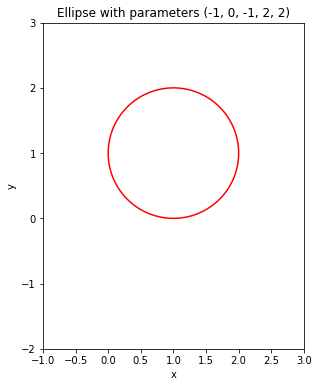

In [8]:
# Here is an example of plot_ellipse.
# This plots (x-1)**2 + (y-1)**2 = 1, 
# which is a circle centered at (1,1). 

plt.figure(figsize=(6,6))
plot_ellipse(-1, 0, -1, 2, 2)
plt.title('Ellipse with parameters (-1, 0, -1, 2, 2)')

### PART C

[ 4.87314137 -7.89293482 -0.22651484]
e = [-0.45289988 -0.23676927 -0.35741872 -0.44536583  0.00824421 -0.02376494
  0.58169536]

||e|| = 0.9624339357020364

||e|| / N = 0.13749056224314807



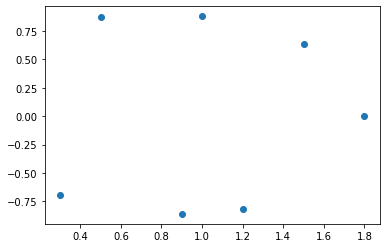

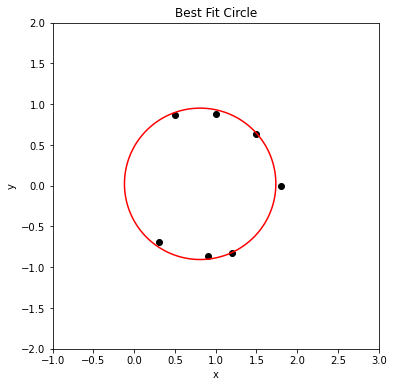

In [9]:
xy = np.array([[0.3, -0.69],
               [0.5, 0.87],
               [0.9, -0.86],
               [1, 0.88],
               [1.2, -0.82],
               [1.5, .64],
               [1.8, 0]])
x = xy[:,0]
y = xy[:,1]

# plot the data points
plt.scatter(x,y)

# First we compute our estimated coefficients
A = np.array([x**2+y**2,x,y]).T 
b = np.ones((7,))
circle_params = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)
print(circle_params)

# Then we plot
plt.figure(figsize=(6,6))
plot_circle(circle_params[0], circle_params[1], circle_params[2])
plt.scatter(x,y, color='k')

# Compute error
e = np.dot(A, circle_params) - b
print("e = {}\n".format(e))

e_magnitude = np.linalg.norm(e)

print("||e|| = {}\n".format(e_magnitude))
N = 7
print("||e|| / N = {}\n".format(e_magnitude / N))

### PART D

[ 4.10382951  0.48711384  4.93938449 -6.85032284 -0.62259259]
e = [-0.00535492  0.00965504 -0.02961637 -0.04065528  0.04157513  0.05047406
 -0.03417349]

||e|| = 0.08997680361065329

||e|| / N = 0.012853829087236184



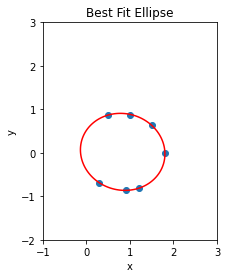

In [10]:
# Plot the data points
plt.scatter(x,y)

A = np.vstack((x**2, x*y, y**2, x, y)).T
b = np.ones((7,))

ellipse_params = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(b)
print(ellipse_params)
plot_ellipse(ellipse_params[0],ellipse_params[1],ellipse_params[2],ellipse_params[3],ellipse_params[4])

# Compute error
e = np.dot(A, ellipse_params) - b
print("e = {}\n".format(e))

e_magnitude = np.linalg.norm(e)

print("||e|| = {}\n".format(e_magnitude))
N = 7
print("||e|| / N = {}\n".format(e_magnitude / N))

## Problem 2: Labeling Patients Using Gene Expression Data

### Part (b)

In [11]:
#Load training data
A = np.load('gene_data_train.npy')
b = np.load('diabetes_train.npy')

In [12]:
#Calculate the coefficients using the train set
# BEGIN
trans = A.T
sqr = trans.dot(A)
pseudoinv = (np.linalg.inv(sqr)).dot(trans)
x = pseudoinv.dot(b)
# END
print(x)

[[ 0.12131475]
 [-0.15253102]
 [-0.36111722]
 [-0.06427341]
 [ 0.95936096]]


Check to make sure your model gives the correct answer for the training set.

In [13]:
#Training set sanity check - compare model outputs with training outputs
b_new = np.sign(A.dot(x))
print(b - b_new)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### Part (c)

In [14]:
#Load test data
A_test = np.load('gene_data_test.npy')
b_test = np.load('diabetes_test.npy')

In [15]:
#Use your alpha coefficients (vector x) on the test set and check their acuracy by finding the error vector
b_calc = np.sign(A_test.dot(x)) # Assigning +1 or -1 to b=Ax based on the sign 
print(b_calc)
print(b_calc - b_test)

[[1.]
 [1.]
 [1.]
 [1.]]
[[0.]
 [0.]
 [2.]
 [0.]]


In lecture, we learned how the GPS receiver determines its location once it knows the distance of the various signaling beacons from itself.
This method is called *trilateration*.

In this demonstration, we're going to further explore the connection between trilateration and least squares through a toy problem with four beacons and one GPS receiver.

We are given *three* possible sets of measurements for the distances of each of the beacons from the receiver:

1. First, the ideal set of measurements. $d_1 = d_2 = d_3 = d_4 = 5$.
2. Next, a set of imperfect measurements. $d_1 = 5, d_2 = 4.5, d_3 = 5, d_4 = 5.5$.
3. Finally, a set of mostly perfect measurements, but $d_1$ is a very bad measurement. We have $d_1 = 6.5$ and $d_2 = d_3 = d_4 
= 5$.


First, we set up some notation for the positions of the beacons, as well as their respective distances from the receivers.

In [91]:
from utils import *

ideal_distances = [5, 5, 5, 5]
imperfect_distances = [5.5, 4.5, 5, 5]
one_bad_distances = [6.5, 5, 5, 5]

#these are the coordinates of the beacons
positions = np.array([
    [0, -5],
    [-5 / 2, 5 * np.sqrt(3) / 2],
    [0, 5],
    [5 / 2, 5 * np.sqrt(3) / 2],
])

xpositions = positions[:, 0]
ypositions = positions[:, 1]

# setup to make the helper functions work
register(positions=positions)
register(xpositions=xpositions)
register(ypositions=ypositions)

### Part (d)

Now, for each of the three above cases, let's plot a circle for each beacon whose radius corresponds to the reported distance of the receiver. The intersection of the circles will tell us, intuitively, where the receiver is located! (Note that the circles do not necessarily intersect at one point for all three of the cases. Think about what this means).

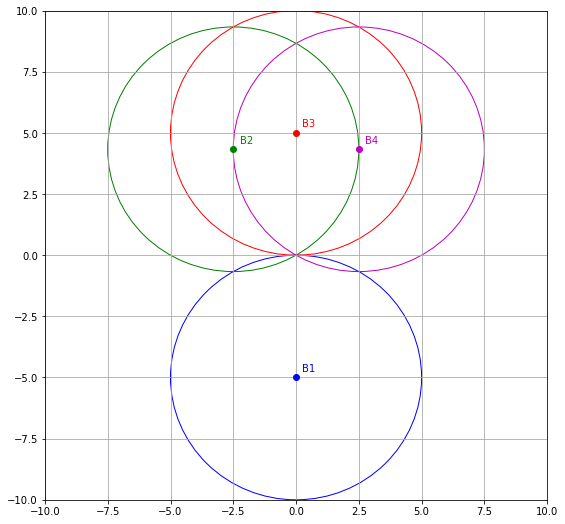

In [81]:
plot(ideal_distances)

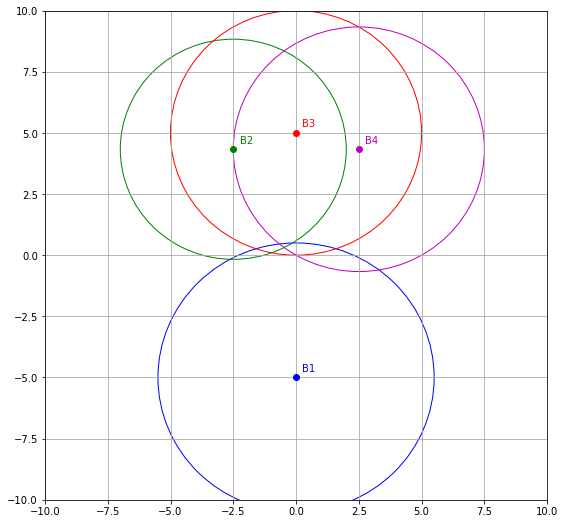

In [82]:
plot(imperfect_distances)

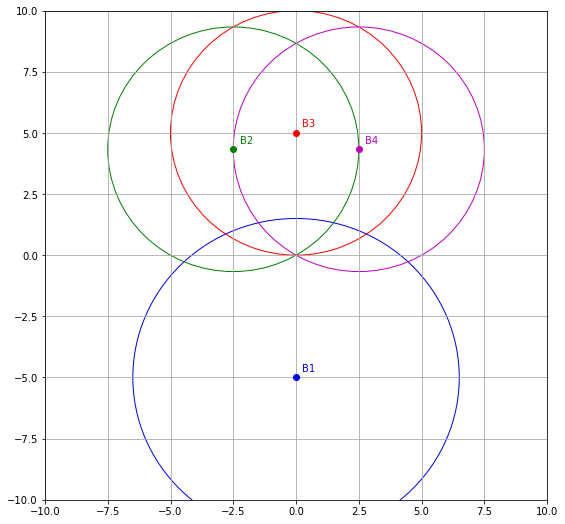

In [83]:
plot(one_bad_distances)

### Part (e)

Now, let's solve for the location of the receiver, $\begin{bmatrix}x \\ y\end{bmatrix}$, using least squares.

Recall that we made the system of equations linear by subtracting the equation for the first beacon from each of the equations for the other beacons.

This will result in the system of equations:
\begin{equation}
A\begin{bmatrix}x \\ y \end{bmatrix} = \vec{b}
\end{equation}

You will define $A$ and $\vec{b}$ in the code blocks below.

In [84]:
A = np.zeros((3,2))

A[0][0] = 2*(xpositions[0] - xpositions[1])
A[0][1] = 2*(ypositions[0] - ypositions[1])
A[1][0] = 2*(xpositions[0] - xpositions[2])
A[1][1] = 2*(ypositions[0] - ypositions[2])
A[2][0] = 2*(xpositions[0] - xpositions[3])
A[2][1] = 2*(ypositions[0] - ypositions[3])
print(A)

[[  5.         -18.66025404]
 [  0.         -20.        ]
 [ -5.         -18.66025404]]


### Part (f)
Fill in the entries of `b` in the below function to correspond to the entries of $\vec{b}$ from the problem.

In [85]:
def make_b(distances):
    """
    Since `b` depends on `distances`, we implement it using a function, so we can generate
    different `b` vectors depending of which set of distances we are interested in,
    (i.e. ideal_distances, imperfect_distances, or one_bad_distances)
    
    Examples of how to call the function:
    make_values(ideal_distances) OR
    make_values(imperfect_distances) OR
    make_values(one_bad_distances)
    """

    b = np.zeros(3)
    
    b[0] = xpositions[0]**2 - xpositions[1]**2 + ypositions[0]**2 - ypositions[1]**2 - distances[0]**2 +distances[1]**2
    b[1] = xpositions[0]**2 - xpositions[2]**2 + ypositions[0]**2 - ypositions[2]**2 - distances[0]**2 +distances[2]**2
    b[2] = xpositions[0]**2 - xpositions[3]**2 + ypositions[0]**2 - ypositions[3]**2 - distances[0]**2 + distances[3]**2

    return b

make_b(ideal_distances)

array([3.55271368e-15, 0.00000000e+00, 3.55271368e-15])

### Part (g)

Now, calculate the linear least squares estimate for the `ideal_distances` data and plot the results. We have given you code for the implementation for this part.

In [86]:
def estimate_position(distances):
    U1 = np.dot(A.T, A)
    U2 = np.dot(A.T, make_b(distances))
    least_squares_sol = np.dot(np.linalg.inv(U1),U2)
    return least_squares_sol

estimate_position(ideal_distances)

array([ 8.59260618e-33, -1.20930181e-16])

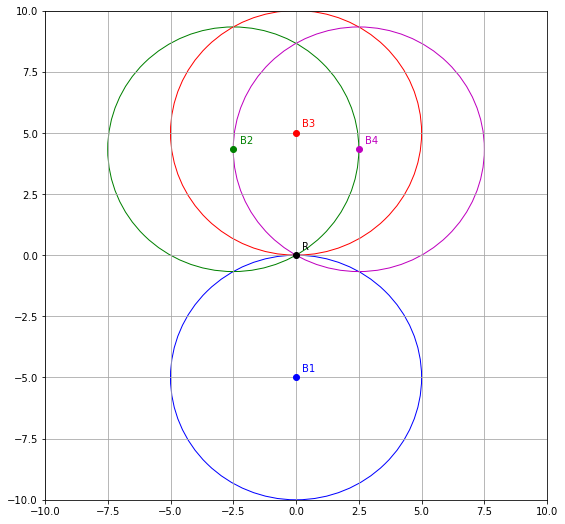

In [87]:
plot(ideal_distances)
plot_point(estimate_position(ideal_distances))

What about for the `imperfect_distances` and `one_bad_distances`? Copy and modify the above code to compute and plot the least-squares trilateration solutions for those two cases, and comment on the quality of the solution in each case.

In particular, for `one_bad_distances`, is the solution the best possible? In other words, if you were trying to identify your position from the graph by hand, would you have chosen the same point that our trilateration solution did?

array([-0.475     ,  0.35531308])

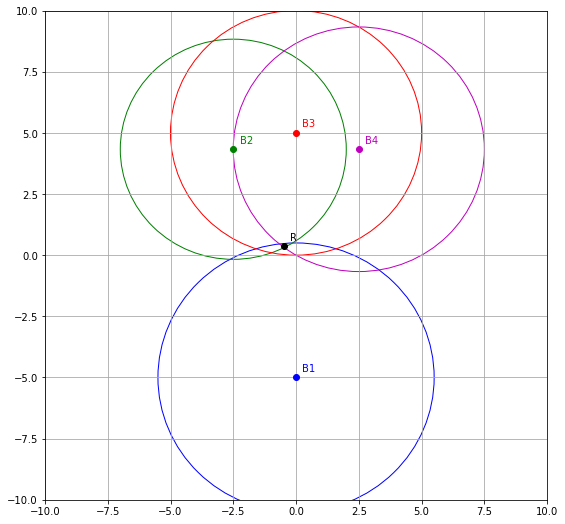

In [88]:
### imperfect_distances case

plot(imperfect_distances)
plot_point(estimate_position(imperfect_distances))
estimate_position(imperfect_distances)

array([-6.40790822e-17,  9.01832908e-01])

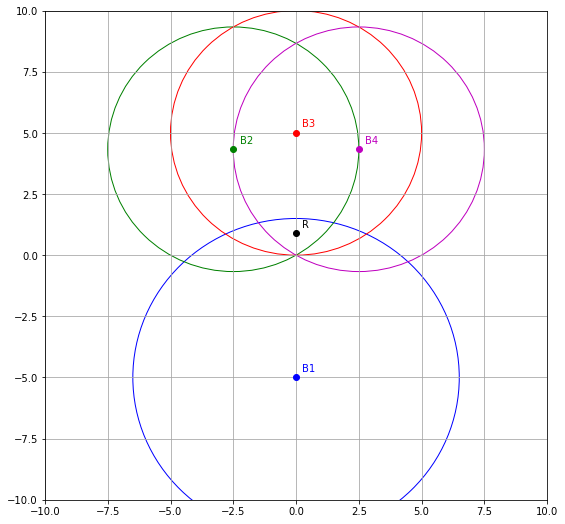

In [89]:
### one_bad_distances case
plot(one_bad_distances)
plot_point(estimate_position(one_bad_distances))
estimate_position(one_bad_distances)

## Problem 3: How Much is Too Much?

Some setup code

In [16]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

%matplotlib inline

"""Function that defines the polynomial curve for a set of 
parameters and a range. The set of parameters defines the 
degree of the polynomial."""
def poly_curve(params,x_input):
    # params contains the coefficients that multiply the polynomial terms, in degree of lowest degree to highest degree
    degree=len(params)-1
    x_range=[x_input[1], x_input[-1]]
    x=np.linspace(x_range[0],x_range[1],1000)
    y=x*0
    
    for k in range(0,degree+1):
        coeff=params[k]
        y=y+list(map(lambda z:coeff*z**k,x))        
    return x,y
    
"""Function that defines a data matrix for some input data."""
def data_matrix(input_data,degree): 
    # degree is the degree of the polynomial you plan to fit the data with    
    Data=np.zeros((len(input_data),degree+1))
    
    for k in range(0,degree+1):
        Data[:,k]=(list(map(lambda x:x**k ,input_data)))
                  
    return Data

"""Function that computes the Least Squares Approximation"""
def leastSquares(D,y): 
    return np.linalg.lstsq(D,y)[0]
                  
np.random.seed(10)

### Part a) 
Some setup code to create our Resistor test Data points and plot them

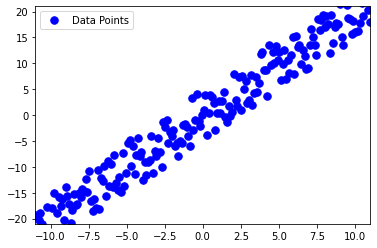

In [17]:
R = 2
x_a = np.linspace(-11,11,200)
y_a = R*x_a + (np.random.rand(len(x_a))-0.5)*10
fig = plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
ax.plot(x_a,y_a, '.b', markersize=15)
ax.legend(['Data Points'])

Let's calculate a polynomial approximation of the above device. 

<ipython-input-16-035e6c53a709>:34: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(D,y)[0]


Text(0.5, 1.0, 'Polynomial of Degree 15')

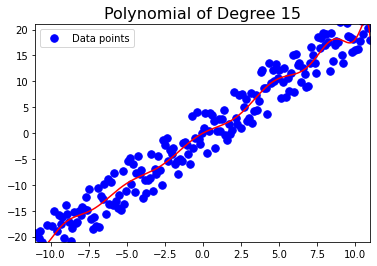

In [18]:
degree=15
D_a = data_matrix(x_a,degree)
p_a = leastSquares(D_a, y_a)

fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
x_a_,y_a_=poly_curve(p_a,x_a)
ax.plot(x_a,y_a,'.b',markersize=15)
ax.plot(x_a_, y_a_, 'r')
ax.legend(['Data points'])
plt.title('Polynomial of Degree %d' %(len(p_a)-1),fontsize=16)

### Part b)

In [19]:
def cost(x, y, start, end):
    """Given a set of x and y points, this function 
    calculates polynomial approximations of varying 
    degrees from start to end and returns the cost 
    of each degree in an array"""
    c = []
    for degree in range(start, end):
        D = data_matrix(x,degree)
        params = leastSquares(D,y)
        error = np.linalg.norm(y-np.dot(D,params))
        c.append(error)
    return c

<ipython-input-16-035e6c53a709>:34: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(D,y)[0]


Text(0.5, 1.0, 'Cost vs Degree')

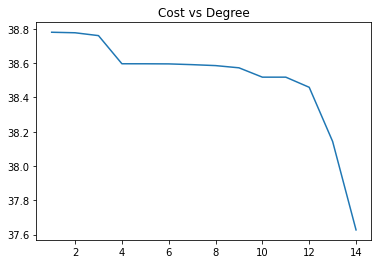

In [20]:
start = 1
end = 15
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(range(start, end), cost(x_a,y_a,start,end))
plt.title('Cost vs Degree')